In [2]:
#Loading libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df_social_marketing = pd.read_csv("social_marketing.csv") #Reading data

In [4]:
df_social_marketing.head() #View first few rows

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df_social_marketing.shape #Dimensions of data

(7882, 37)

In [6]:
df_social_marketing.info() # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        7882 non-null   object
 1   chatter           7882 non-null   int64 
 2   current_events    7882 non-null   int64 
 3   travel            7882 non-null   int64 
 4   photo_sharing     7882 non-null   int64 
 5   uncategorized     7882 non-null   int64 
 6   tv_film           7882 non-null   int64 
 7   sports_fandom     7882 non-null   int64 
 8   politics          7882 non-null   int64 
 9   food              7882 non-null   int64 
 10  family            7882 non-null   int64 
 11  home_and_garden   7882 non-null   int64 
 12  music             7882 non-null   int64 
 13  news              7882 non-null   int64 
 14  online_gaming     7882 non-null   int64 
 15  shopping          7882 non-null   int64 
 16  health_nutrition  7882 non-null   int64 
 17  college_uni   

#### No missing values

### Exploratory Data Analysis

In [8]:
#Rename the user column
df_social_marketing = df_social_marketing.rename(columns={"Unnamed: 0":"userid"})
#get category column names
categories = list(df_social_marketing.columns)
categories.remove("userid")

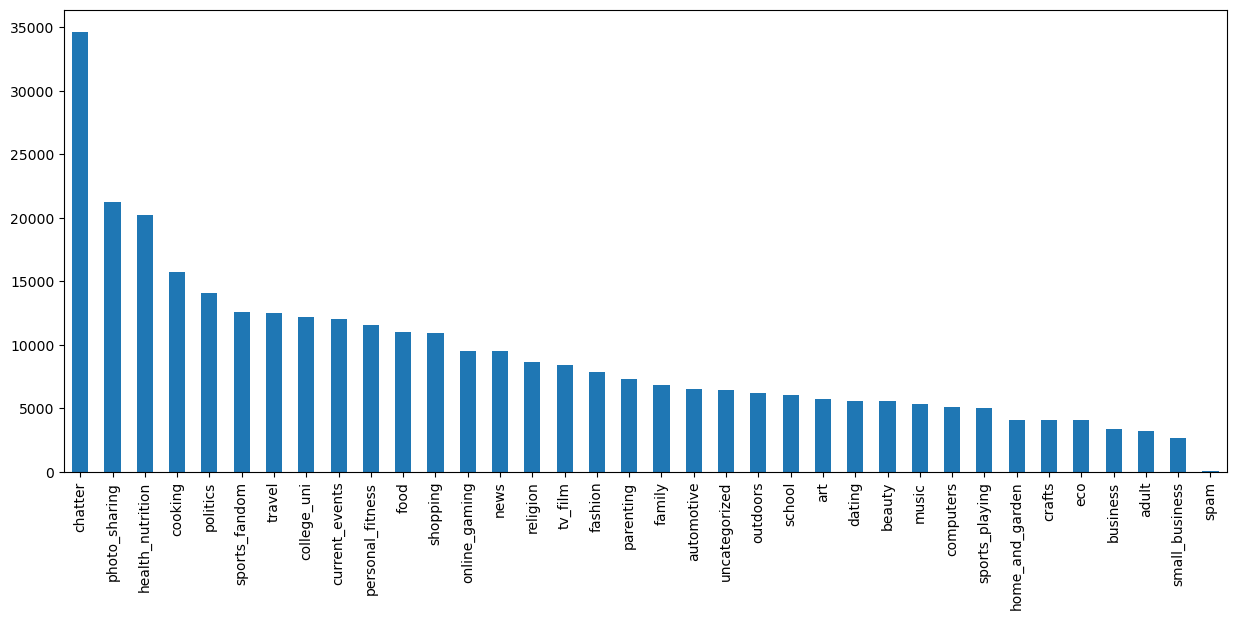

In [9]:
plt.figure(figsize=(15,6))
df_social_marketing[categories].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

### Q1: What are the most popular categories annotated by the users?

In [11]:
df_social_marketing[categories].sum().sort_values(ascending=False)[:5]

chatter             34671
photo_sharing       21256
health_nutrition    20235
cooking             15750
politics            14098
dtype: int64

#### Chatter, Photo sharing, health nutrition, cooking and politics are the most popular categories annotated by the users

### Q2: What are the least popular categories annotated by the users?

In [12]:
df_social_marketing[categories].sum().sort_values()[:5]

spam                51
small_business    2651
adult             3179
business          3336
eco               4038
dtype: int64

#### Spam, Small business, adult, business, eco are the least popular categories annotated by the users

#### Principal Component Analysis

In [14]:
scaler = StandardScaler() #Standardizing the data

scaled_data=df_social_marketing.copy()
scaled_data=pd.DataFrame(scaler.fit_transform(scaled_data[categories]), columns=categories)
scaled_data.head()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,-0.679746,-1.202909,0.181587,-0.255105,1.268450,-0.042375,-0.274906,-0.590128,1.465837,0.120207,...,-0.049829,-0.531060,0.051912,0.162234,-0.646111,3.965726,-0.545084,-0.544138,-0.077692,-0.222424
1,-0.396372,1.161512,0.181587,-0.621226,0.199839,-0.042375,1.113481,-0.260196,0.339358,1.003217,...,-0.572101,-0.531060,-0.608040,0.162234,2.720372,-0.607904,-0.545084,-0.544138,-0.077692,-0.222424
2,0.453751,1.161512,1.056713,0.111016,0.199839,2.369184,-0.737702,0.069737,-0.223881,0.120207,...,-0.572101,0.222055,-0.608040,0.162234,-0.646111,-0.607904,0.001874,-0.544138,-0.077692,-0.222424
3,-0.963120,2.737792,0.181587,-0.255105,-0.868772,-0.042375,-0.737702,-0.260196,-0.787120,0.120207,...,-0.572101,0.222055,-0.608040,-0.398859,-0.646111,-0.607904,-0.545084,-0.544138,-0.077692,-0.222424
4,0.170377,0.373372,-0.693539,1.209379,0.199839,-0.645265,-0.737702,0.069737,-0.787120,0.120207,...,-0.572101,-0.531060,-0.608040,-0.398859,-0.646111,-0.607904,-0.545084,1.073703,-0.077692,-0.222424


In [15]:
pca = PCA(n_components=36) #Setting the PCA at 36 at random
Principal_components=pca.fit_transform(scaled_data)
pca_cols = ["pc_"+ str(x+1) for x in range(36)]
pca_df = pd.DataFrame(data = Principal_components, columns = pca_cols)

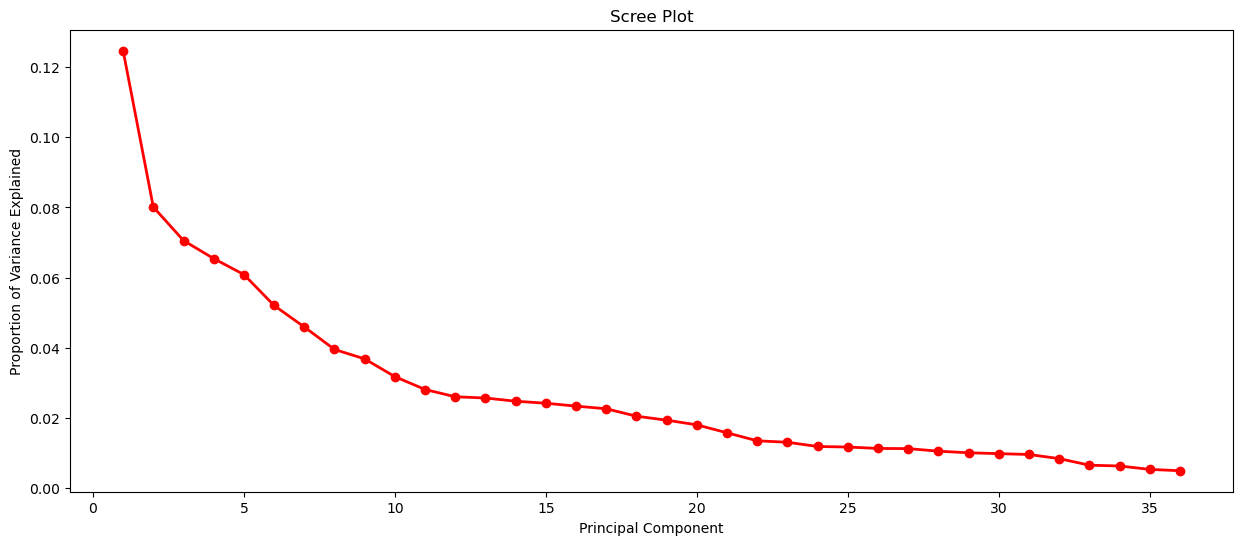

In [16]:
plt.figure(figsize=(15,6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [17]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.12467878 0.08011168 0.07056843 0.06541427 0.06086704 0.05204886
 0.04592267 0.03951959 0.03681735 0.0317614  0.02809284 0.0260204
 0.02566978 0.02475664 0.02417864 0.02335712 0.0226012  0.02048174
 0.01935146 0.01802028 0.01575473 0.01346832 0.01305628 0.01185093
 0.01169306 0.01129108 0.0112451  0.01051084 0.01005578 0.00980899
 0.0095659  0.00839562 0.00651852 0.00628753 0.00531852 0.00493864]
Cumulative Prop. Variance Explained:  [0.12467878 0.20479045 0.27535888 0.34077315 0.40164019 0.45368905
 0.49961172 0.53913131 0.57594867 0.60771007 0.63580291 0.66182331
 0.68749308 0.71224973 0.73642837 0.75978548 0.78238668 0.80286842
 0.82221988 0.84024016 0.85599489 0.86946321 0.88251949 0.89437043
 0.90606348 0.91735456 0.92859966 0.93911051 0.94916629 0.95897527
 0.96854117 0.97693679 0.98345531 0.98974284 0.99506136 1.        ]


#### We can take 25 components to get explained variance of 90%

In [18]:
pca = PCA(n_components=25)
Principal_components=pca.fit_transform(scaled_data)
pca_cols = ["pc_"+ str(x+1) for x in range(25)]
pca_df = pd.DataFrame(data = Principal_components, columns = pca_cols)

### Clustering

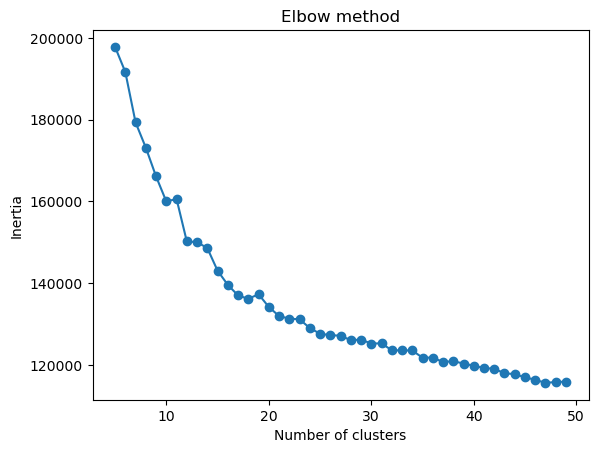

In [19]:
# Elbow plot to determine the number of clusters
inertias = []

for i in range(5,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(5,50), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Based on elbow plot, 20 clusters can be the ideal number of clusters

In [20]:
n_clus = 20 #Using the clusters given by elbow method
kmeans_final = KMeans(n_clusters=n_clus,  random_state=10)
kmeans_final.fit(pca_df)

KMeans(n_clusters=20, random_state=10)

In [22]:
df_social_marketing['cluster'] = kmeans_final.labels_

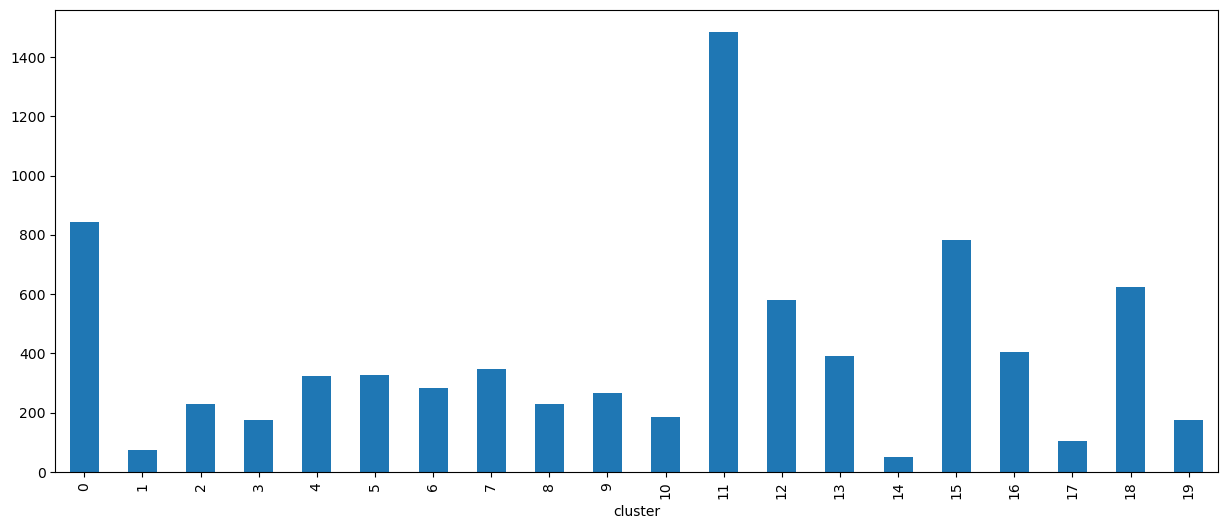

In [23]:
plt.figure(figsize=(15,6))
df_social_marketing.groupby('cluster')['userid'].count().plot(kind='bar')
plt.show()

In [26]:
# Top categories in each cluster
df_clus_categories = pd.DataFrame(columns=['cluster','Top 1','Top 2','Top 3','Top 4','Top 5','Bottom 1','Bottom 2','Bottom 3','Bottom 4','Bottom 5'])
data_rows = []
for cluster in range(n_clus):
    df_clus = df_social_marketing[df_social_marketing['cluster'] == cluster]
    top_categories = df_clus[categories].sum().sort_values(ascending=False)[:5].index.values
    bottom_categories = df_clus[categories].sum().sort_values()[:5].index.values
    row_values = {'cluster':cluster,'Top 1':top_categories[0],'Top 2':top_categories[1],'Top 3':top_categories[2],'Top 4':top_categories[3],'Top 5':top_categories[4],'Bottom 1':bottom_categories[0],'Bottom 2':bottom_categories[1],'Bottom 3':bottom_categories[2],'Bottom 4':bottom_categories[3],'Bottom 5':bottom_categories[4]}
    data_rows.append(row_values)

# Convert the list of dictionaries to a DataFrame and concatenate with the original DataFrame
df_clus_categories = pd.concat([df_clus_categories, pd.DataFrame(data_rows)], ignore_index=True)

# Display the resulting DataFrame
df_clus_categories

,cluster,Top 1,Top 2,Top 3,Top 4,Top 5,Bottom 1,Bottom 2,Bottom 3,Bottom 4,Bottom 5
0,0,chatter,current_events,photo_sharing,travel,politics,spam,adult,small_business,business,beauty
1,1,health_nutrition,personal_fitness,sports_fandom,religion,chatter,spam,adult,small_business,art,business
2,2,college_uni,tv_film,chatter,music,photo_sharing,spam,adult,art,school,eco
3,3,cooking,fashion,photo_sharing,beauty,chatter,spam,adult,small_business,dating,business
4,4,politics,travel,computers,chatter,news,spam,adult,beauty,art,home_and_garden
5,5,college_uni,online_gaming,chatter,sports_playing,photo_sharing,spam,adult,business,small_business,beauty
6,6,sports_fandom,religion,food,parenting,chatter,spam,adult,small_business,business,dating
7,7,chatter,photo_sharing,shopping,current_events,health_nutrition,spam,adult,art,beauty,outdoors
8,8,art,tv_film,chatter,photo_sharing,travel,spam,adult,computers,dating,automotive
9,9,health_nutrition,personal_fitness,chatter,cooking,outdoors,spam,adult,small_business,beauty,business


### Hierarchical clustering

In [28]:
# Perform hierarchical/agglomerative clustering using scikit-learn
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(pca_df)
# Output cluster labels
print("Cluster labels:", labels)

Cluster labels: [0 0 0 ... 0 0 0]


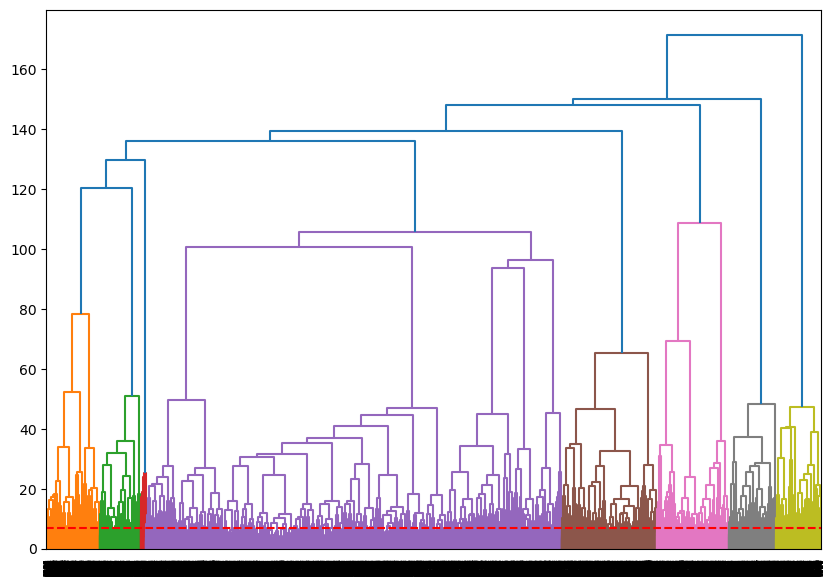

In [29]:
# Perform hierarchical/agglomerative clustering
linked = linkage(pca_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.axhline(y=7, color='r', linestyle='--')
plt.show()

#### Based on dendrogram, we can use 8 clusters

In [30]:
# Perform hierarchical/agglomerative clustering using scikit-learn
cluster = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(pca_df)
# Output cluster labels
print("Cluster labels:", labels)

Cluster labels: [4 2 1 ... 4 6 1]


In [31]:
df_social_marketing['h_cluster'] = labels

<Axes: xlabel='h_cluster'>

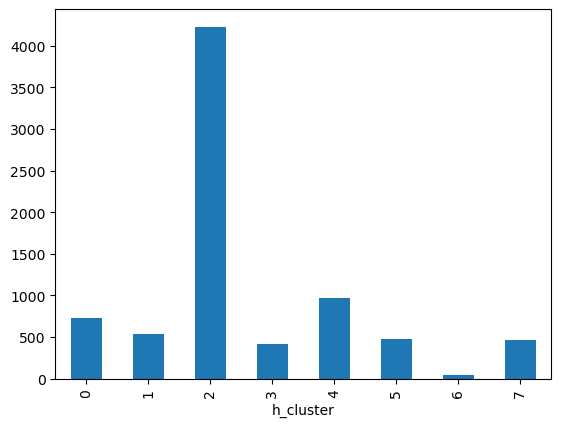

In [32]:
df_social_marketing.groupby('h_cluster')['userid'].count().plot(kind='bar')

In [35]:
# Let's look at the top categories in each cluster
df_hclus_categories = pd.DataFrame(columns=['cluster','size','Top 1','Top 2','Top 3','Top 4','Top 5','Bottom 1','Bottom 2','Bottom 3','Bottom 4','Bottom 5'])
data_rows = []
for cluster in range(8):
    df_clus = df_social_marketing[df_social_marketing['h_cluster'] == cluster]
    top_categories = df_clus[categories].sum().sort_values(ascending=False)[:5].index.values
    bottom_categories = df_clus[categories].sum().sort_values()[:5].index.values
    row_values = {'cluster':cluster,'size':df_clus.shape[0], 'Top 1':top_categories[0],'Top 2':top_categories[1],'Top 3':top_categories[2],'Top 4':top_categories[3],'Top 5':top_categories[4],'Bottom 1':bottom_categories[0],'Bottom 2':bottom_categories[1],'Bottom 3':bottom_categories[2],'Bottom 4':bottom_categories[3],'Bottom 5':bottom_categories[4]}
    data_rows.append(row_values)

# Convert the list of dictionaries into a DataFrame
df_hclus_categories = pd.DataFrame(data_rows)

# Display the resulting DataFrame
df_hclus_categories


,cluster,size,Top 1,Top 2,Top 3,Top 4,Top 5,Bottom 1,Bottom 2,Bottom 3,Bottom 4,Bottom 5
0,0,731,politics,travel,news,chatter,photo_sharing,spam,adult,beauty,small_business,art
1,1,543,tv_film,art,chatter,college_uni,photo_sharing,spam,adult,computers,dating,eco
2,2,4229,chatter,photo_sharing,current_events,shopping,sports_fandom,spam,small_business,art,business,computers
3,3,418,college_uni,online_gaming,chatter,photo_sharing,sports_playing,spam,adult,business,small_business,eco
4,4,972,health_nutrition,personal_fitness,chatter,cooking,photo_sharing,spam,adult,small_business,beauty,business
5,5,479,cooking,photo_sharing,fashion,chatter,beauty,spam,adult,small_business,eco,business
6,6,49,adult,chatter,health_nutrition,photo_sharing,travel,business,sports_playing,small_business,beauty,crafts
7,7,461,sports_fandom,religion,food,chatter,parenting,spam,small_business,adult,dating,business


#### Cluster 0:Global News and Travel Enthusiasts

Size: 731 users

Top Themes: Politics, Travel, News, Chatter, Photo Sharing

Description: This group is engaged in political discussions, global news, and travel. They often share photos and engage in general chatter, indicating an interest in staying informed about world events and documenting their experiences.

#### Cluster 1: Cultural Creatives

Size: 543 users

Top Themes: TV/Film, Art, Chatter, College/Uni, Photo Sharing

Description: This segment focuses on entertainment, arts, and education. They are likely to be college students or recent graduates who enjoy TV, films, and artistic content. Their frequent use of photo sharing suggests they are visually expressive and active on social media.

#### Cluster 2: Everyday Socializers

Size: 4229 users

Top Themes: Chatter, Photo Sharing, Current Events, Shopping, Sports Fandom

Description: This is the largest segment, characterized by general chatter and photo sharing. They are interested in current events, shopping, and sports. This cluster represents a broad, socially active group that engages in daily life activities and popular culture.

#### Cluster 3: Digital Gamers and Students

Size: 418 users

Top Themes: College/Uni, Online Gaming, Chatter, Photo Sharing, Sports Playing

Description: This cluster consists of users who are highly engaged in online gaming and are likely students. They are active in social discussions and enjoy sharing their gaming and college experiences online.

#### Cluster 4: Health and Wellness Advocates

Size: 972 users

Top Themes: Health/Nutrition, Personal Fitness, Chatter, Cooking, Photo Sharing

Description: Users in this cluster are focused on health, nutrition, and personal fitness. They enjoy cooking and sharing their healthy lifestyle on social media. This group is health-conscious and promotes wellness.

#### Cluster 5:Style and Lifestyle Enthusiasts

Size: 479 users

Top Themes: Cooking, Photo Sharing, Fashion, Chatter, Beauty

Description: This segment is engaged in cooking, fashion, and beauty. They enjoy sharing their lifestyle through photos and social interactions, likely influencing trends in style and food.

#### Cluster 6:Mature Lifestyle Explorers

Size: 49 users

Top Themes: Adult, Chatter, Health/Nutrition, Photo Sharing, Travel

Description: This small cluster is characterized by adult content but also shows an interest in health, nutrition, and travel. They are likely mature users who engage in varied content, balancing personal interests with general social activity.

#### Cluster 7:Community-Oriented Fans

Size: 461 users

Top Themes: Sports Fandom, Religion, Food, Chatter, Parenting

Description: Users in this group are passionate about sports, food, and religion. They are likely family-oriented and active in community discussions, engaging in topics that resonate with their values and interests.